In [13]:
# Load dataset (assuming you have IMDb dataset in CSV format)
# Dataset can be downloaded from: http://ai.stanford.edu/~amaas/data/sentiment/
# Make sure the file 'IMDB Dataset.csv' is in the correct directory or provide the full path
df = pd.read_csv('/IMDB Dataset.csv') # Replace '/path/to/your/' with the actual path
print(df.head())
print("\nClass distribution:")
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset (assuming you have IMDb dataset in CSV format)
# Dataset can be downloaded from: http://ai.stanford.edu/~amaas/data/sentiment/
df = pd.read_csv('/IMDB Dataset.csv')
print(df.head())
print("\nClass distribution:")
print(df['sentiment'].value_counts())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(clean_text)
print(df['cleaned_review'].head())

0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


Logistic Regression Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Random Forest Accuracy: 0.8455
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.83      0.84      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



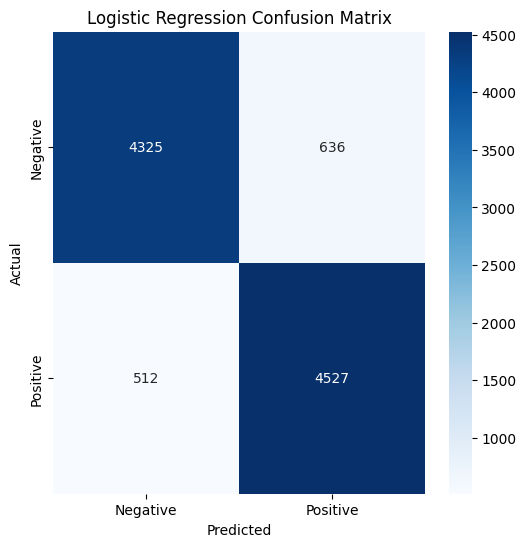

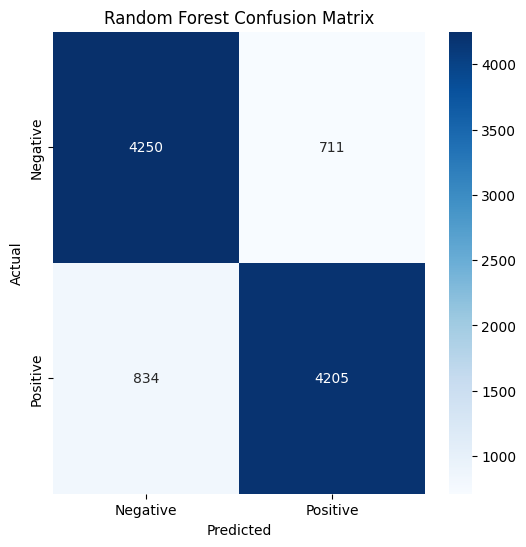

In [17]:
# Split data
X = df['cleaned_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 358s 565ms/step - accuracy: 0.5121 - loss: 0.6931 - val_accuracy: 0.5406 - val_loss: 0.6805
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 569ms/step - accuracy: 0.5350 - loss: 0.6781 - val_accuracy: 0.5427 - val_loss: 0.6693
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 554ms/step - accuracy: 0.5586 - loss: 0.6513 - val_accuracy: 0.7579 - val_loss: 0.5459
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 552ms/step - accuracy: 0.8265 - loss: 0.4394 - val_accuracy: 0.8643 - val_loss: 0.3231
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 346s 554ms/step - accuracy: 0.8944 - loss: 0.2766 - val_accuracy: 0.8693 - val_loss: 0.3262


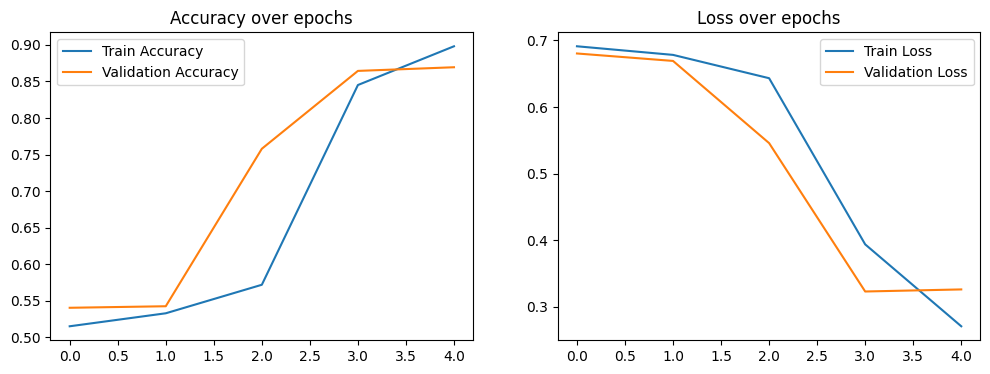

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step
LSTM Accuracy: 0.8693
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4961
           1       0.84      0.91      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



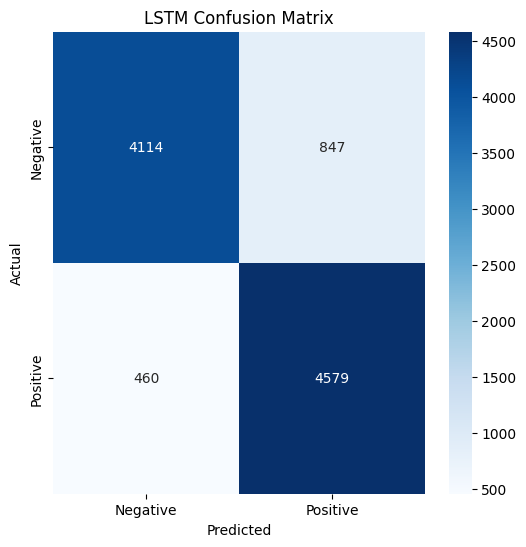

In [18]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 200  # Average review length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Training
history = model.fit(X_train_pad, y_train,
                   epochs=5,
                   batch_size=64,
                   validation_data=(X_test_pad, y_test))

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

# Evaluation
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))
plot_confusion_matrix(y_test, y_pred_lstm, "LSTM Confusion Matrix")

In [20]:
def predict_sentiment(text):
    # Preprocess
    cleaned_text = clean_text(text)
    # For traditional models
    text_tfidf = tfidf.transform([cleaned_text])
    lr_pred = lr.predict(text_tfidf)[0]
    rf_pred = rf.predict(text_tfidf)[0]
    # For LSTM
    seq = tokenizer.texts_to_sequences([cleaned_text])
    pad = pad_sequences(seq, maxlen=max_len)
    lstm_pred = (model.predict(pad) > 0.5).astype(int)[0][0]

    results = {
        'Logistic Regression': 'Positive' if lr_pred == 1 else 'Negative',
        'Random Forest': 'Positive' if rf_pred == 1 else 'Negative',
        'LSTM': 'Positive' if lstm_pred == 1 else 'Negative',
        'Cleaned Text': cleaned_text
    }
    return results

# Test with a sample review
sample_review = "This movie was fantastic! The acting was superb and the plot kept me engaged throughout."
print(predict_sentiment(sample_review))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
{'Logistic Regression': 'Positive', 'Random Forest': 'Positive', 'LSTM': 'Positive', 'Cleaned Text': 'movie fantastic acting superb plot kept engaged throughout'}
